# Import modules


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.api as sm


## Read in dataset


In [46]:
file_path = '/kaggle/input/bank-debt-data/bank_data.csv'
df = pd.read_csv(file_path, engine='python')
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [47]:
df.tail()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female
1881,522,9964,16706.305920,Level 4 Recovery,53,Male


In [48]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


# Graphical Exploratory Data Analysis
## Statistical test: age vs. expected recovery amount

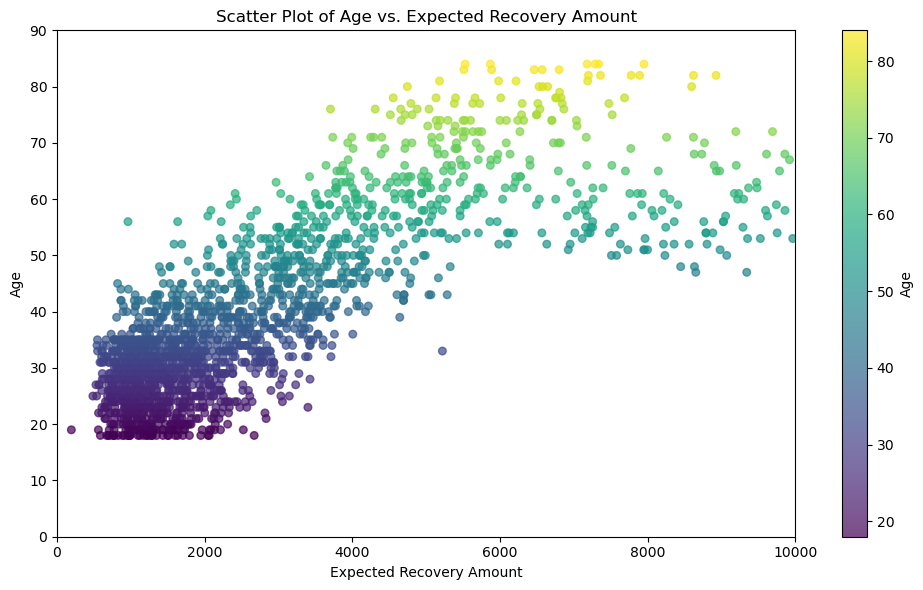

In [49]:
# Set up a custom color palette
sns.set_palette("viridis")
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=df['expected_recovery_amount'], y=df['age'], c=df['age'], cmap='viridis', s=30, alpha=0.7)
plt.xlim(0, 10000)
plt.ylim(0, 90)

cbar = plt.colorbar(scatter)
cbar.set_label("Age")

plt.xlabel("Expected Recovery Amount")
plt.ylabel("Age")
plt.title("Scatter Plot of Age vs. Expected Recovery Amount")

plt.tight_layout()
plt.show()







## Enhance Statistical Analysis: Kruskal-Wallis Test:
### Statistical test: age vs. expected recovery amount



In [50]:
era_900_1100 = df.loc[(df['expected_recovery_amount']<1100) & 
                      (df['expected_recovery_amount']>=900)]
# Define Level_0_age and Level_1_age
Level_0_age = era_900_1100.loc[df['recovery_strategy'] == "Level 0 Recovery"]['age']
Level_1_age = era_900_1100.loc[df['recovery_strategy'] == "Level 1 Recovery"]['age']

statistic, p_value = stats.kruskal(Level_0_age, Level_1_age)

print("Kruskal-Wallis Test:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")


Kruskal-Wallis Test:
Test Statistic: 3.4572342749517513
P-value: 0.06297556896097407


### Visualization: Box Plot:


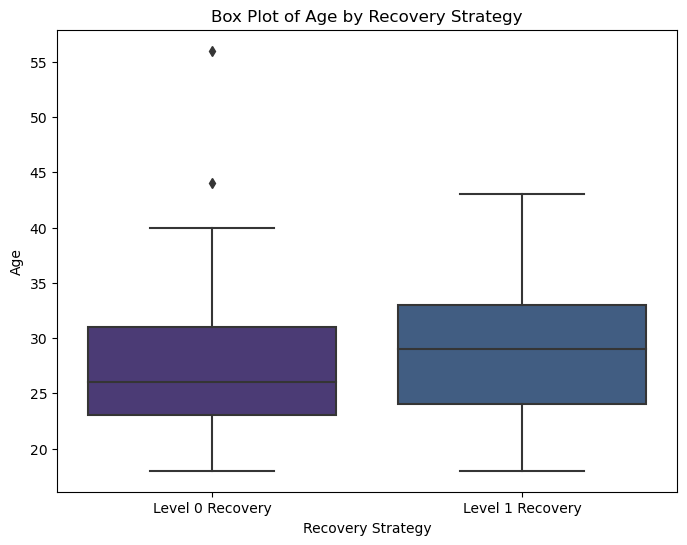

In [51]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='recovery_strategy', y='age', data=era_900_1100)
plt.xlabel("Recovery Strategy")
plt.ylabel("Age")
plt.title("Box Plot of Age by Recovery Strategy")
plt.show()


### Visualization: Violin Plot:


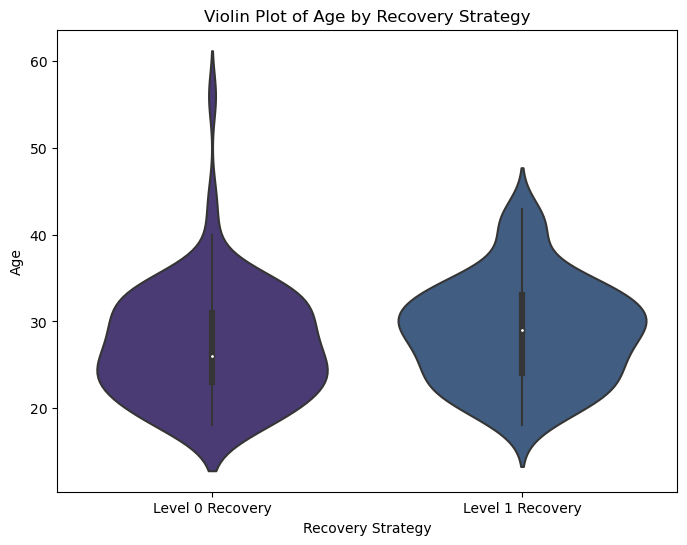

In [52]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='recovery_strategy', y='age', data=era_900_1100)
plt.xlabel("Recovery Strategy")
plt.ylabel("Age")
plt.title("Violin Plot of Age by Recovery Strategy")
plt.show()


## Statistical test: sex vs. expected recovery amount
###  Perform chi-square test


In [53]:
filtered_data = df[(df['expected_recovery_amount'] < 1100) & (df['expected_recovery_amount'] >= 900)]

crosstab = pd.crosstab(filtered_data['recovery_strategy'], filtered_data['sex'])

print(crosstab)

# Perform chi-square test
chi2_stat, p_val, dof, ex = stats.chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")

sex                Female  Male
recovery_strategy              
Level 0 Recovery       32    57
Level 1 Recovery       39    55
Chi-square statistic: 0.3796422112341753
P-value: 0.5377947810444592


### Visualization using a heatmap


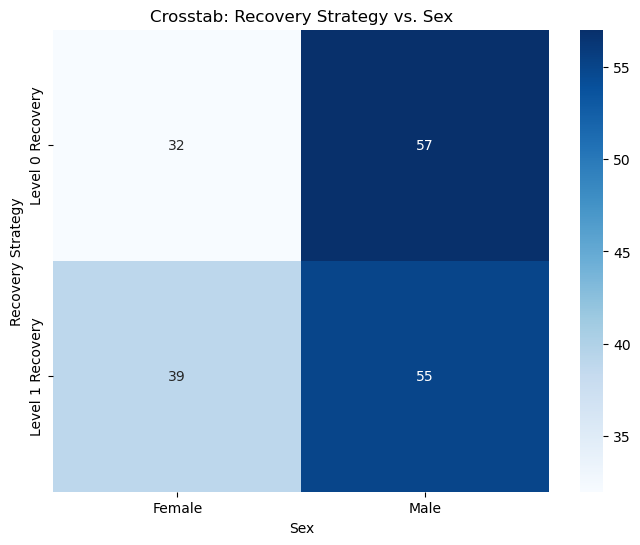

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="Blues")
plt.title("Crosstab: Recovery Strategy vs. Sex")
plt.xlabel("Sex")
plt.ylabel("Recovery Strategy")
plt.show()

## Exploratory graphical analysis: recovery amount


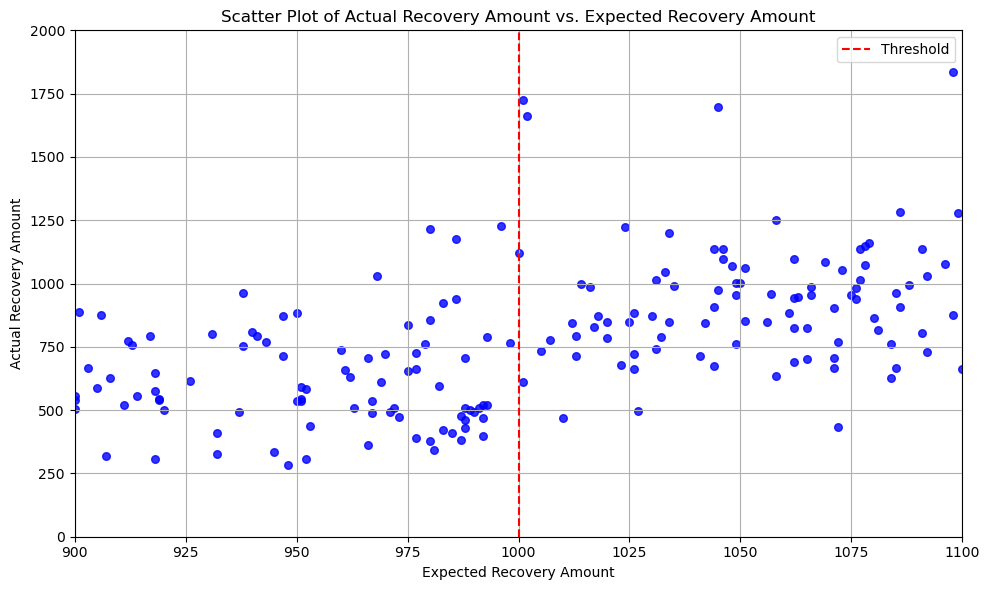

In [55]:

plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(x=df['expected_recovery_amount'], y=df['actual_recovery_amount'], c="b", s=30, alpha=0.8)
plt.xlim(900, 1100)
plt.ylim(0, 2000)
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Scatter Plot of Actual Recovery Amount vs. Expected Recovery Amount")
plt.legend(["Data"], loc=2)  # Add legend
plt.axvline(x=1000, color='r', linestyle='--', label="Threshold")  # Add vertical line for the threshold
plt.legend()
plt.grid(True)  # Add grid lines for better readability

# Show the plot
plt.tight_layout()
plt.show()








## Compute average actual recovery amount just below and above the threshold


In [56]:
era_950_1050 = df.loc[(df['expected_recovery_amount'] < 1050) & 
                      (df['expected_recovery_amount'] >= 950)]

by_recovery_strategy_narrow = era_950_1050.groupby(['recovery_strategy'])
avg_recovery_by_strategy_narrow = by_recovery_strategy_narrow['actual_recovery_amount'].mean()
print("Average Actual Recovery Amount by Recovery Strategy (Narrow Range):")
print(avg_recovery_by_strategy_narrow)




Average Actual Recovery Amount by Recovery Strategy (Narrow Range):
recovery_strategy
Level 0 Recovery    626.140273
Level 1 Recovery    947.035496
Name: actual_recovery_amount, dtype: float64


## Perform Kruskal-Wallis test for the narrower range


In [57]:
Level_0_actual_narrow = era_950_1050.loc[era_950_1050['recovery_strategy'] == 'Level 0 Recovery']['actual_recovery_amount']
Level_1_actual_narrow = era_950_1050.loc[era_950_1050['recovery_strategy'] == 'Level 1 Recovery']['actual_recovery_amount']

kw_stat_narrow, p_val_narrow = stats.kruskal(Level_0_actual_narrow, Level_1_actual_narrow)
print("Kruskal-Wallis Test (Narrow Range):")
print(f"Test Statistic: {kw_stat_narrow}")
print(f"P-value: {p_val_narrow}")

Kruskal-Wallis Test (Narrow Range):
Test Statistic: 30.246000000000038
P-value: 3.80575314300276e-08


## Visualize the narrower range using box plots


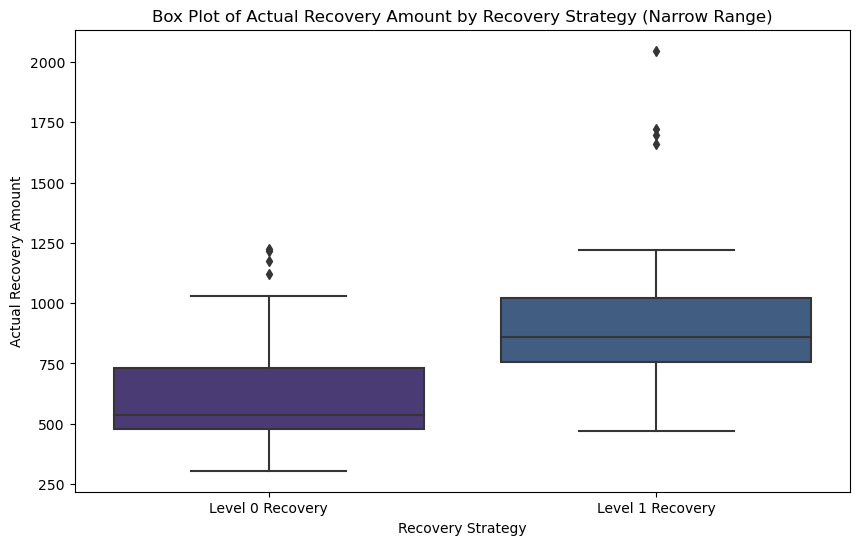

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='recovery_strategy', y='actual_recovery_amount', data=era_950_1050)
plt.xlabel("Recovery Strategy")
plt.ylabel("Actual Recovery Amount")
plt.title("Box Plot of Actual Recovery Amount by Recovery Strategy (Narrow Range)")
plt.show()


## Visualize the narrower range using violin plots


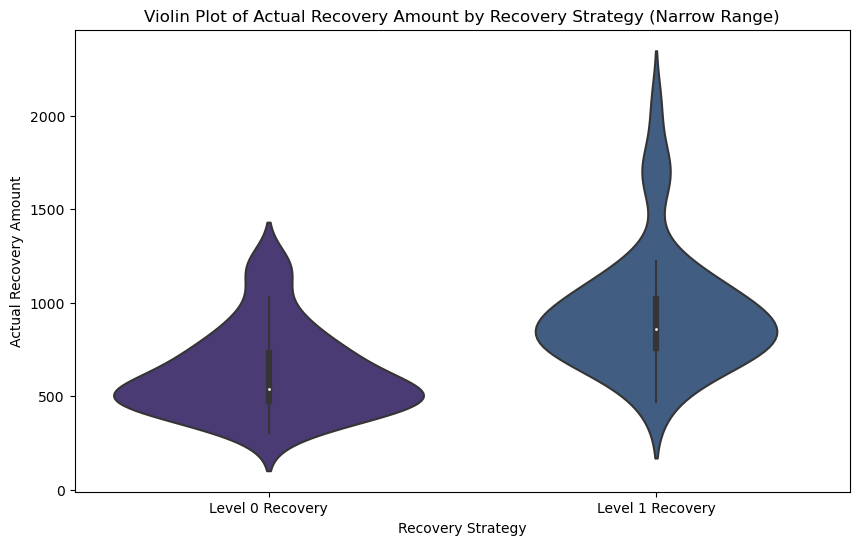

In [59]:
# Visualize the narrower range using violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='recovery_strategy', y='actual_recovery_amount', data=era_950_1050)
plt.xlabel("Recovery Strategy")
plt.ylabel("Actual Recovery Amount")
plt.title("Violin Plot of Actual Recovery Amount by Recovery Strategy (Narrow Range)")
plt.show()

# Regression modeling: no threshold

In [60]:
X = era_900_1100['expected_recovery_amount']
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.256
Method:                     Least Squares   F-statistic:                     63.78
Date:                    Sun, 20 Aug 2023   Prob (F-statistic):           1.56e-13
Time:                            16:59:02   Log-Likelihood:                -1278.9
No. Observations:                     183   AIC:                             2562.
Df Residuals:                         181   BIC:                             2568.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -1978.7597    347.741     -5.690      0.000   -2664.907   -1292.612
expected_recovery_amount     2.7577      0.345      7.986      0.000       2.076       3.439
==============================================================================
Omnibus:                       64.493   Durbin-Watson:                   1.777
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.818
Skew:                           1.463   Prob(JB):                     4.47e-41
Kurtosis:                       6.977   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualize the regression line along with the data points


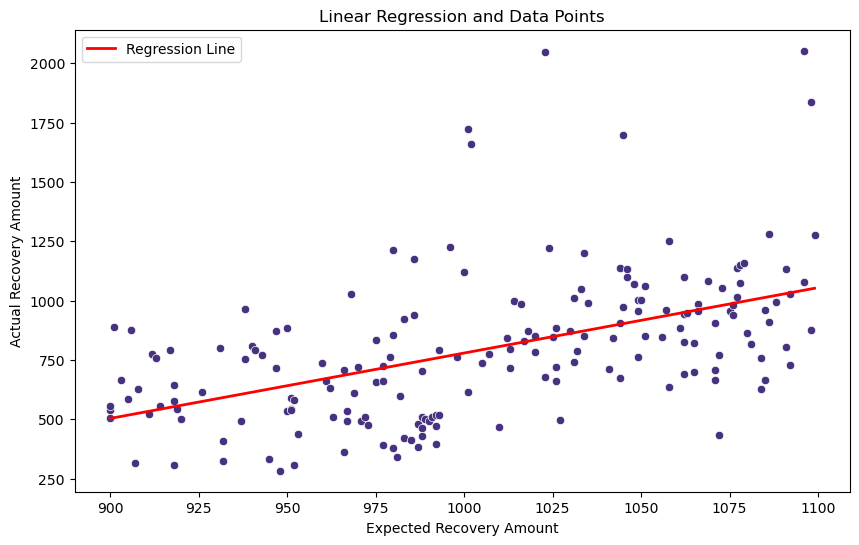

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=era_900_1100)
plt.plot(era_900_1100['expected_recovery_amount'], predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Linear Regression and Data Points")
plt.legend()
plt.show()

# Regression modeling: adding true threshold


In [62]:
#Create indicator (0 or 1) for expected recovery amount >= $1000
df['indicator_1000'] = np.where(df['expected_recovery_amount']<1000, 0, 1)
era_900_1100 = df.loc[(df['expected_recovery_amount']<1100) & 
                      (df['expected_recovery_amount']>=900)]

# Define X and y
X = era_900_1100[['expected_recovery_amount','indicator_1000']]
y = era_900_1100['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.314
Model:                                OLS   Adj. R-squared:                  0.307
Method:                     Least Squares   F-statistic:                     41.22
Date:                    Sun, 20 Aug 2023   Prob (F-statistic):           1.83e-15
Time:                            16:59:02   Log-Likelihood:                -1272.0
No. Observations:                     183   AIC:                             2550.
Df Residuals:                         180   BIC:                             2560.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        3.3440    626.274      0.005      0.996   -1232.440    1239.128
expected_recovery_amount     0.6430      0.655      0.981      0.328      -0.650       1.936
indicator_1000             277.6344     74.043      3.750      0.000     131.530     423.739
==============================================================================
Omnibus:                       65.977   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.537
Skew:                           1.510   Prob(JB):                     3.12e-41
Kurtosis:                       6.917   Cond. No.                     3.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualize the regression line along with the data points

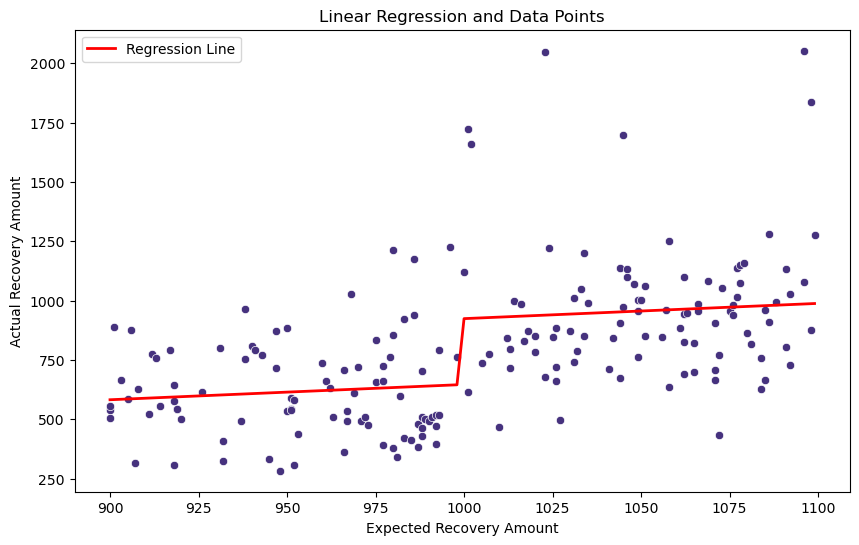

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=era_900_1100)
plt.plot(era_900_1100['expected_recovery_amount'], model.fittedvalues, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Linear Regression and Data Points")
plt.legend()
plt.show()

# Regression modeling: adjusting the window


In [64]:
# Redefine era_950_1050 so the indicator variable is included
era_950_1050 = df.loc[(df['expected_recovery_amount']<1050) & 
                      (df['expected_recovery_amount']>=950)]

# Define X and y 
X = era_950_1050[['expected_recovery_amount','indicator_1000']]
y = era_950_1050['actual_recovery_amount']
X = sm.add_constant(X)

# Build linear regression model
model = sm.OLS(y,X).fit()

# Print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.283
Model:                                OLS   Adj. R-squared:                  0.269
Method:                     Least Squares   F-statistic:                     18.99
Date:                    Sun, 20 Aug 2023   Prob (F-statistic):           1.12e-07
Time:                            16:59:03   Log-Likelihood:                -692.92
No. Observations:                      99   AIC:                             1392.
Df Residuals:                          96   BIC:                             1400.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     -279.5243   1840.707     -0.152      0.880   -3933.298    3374.250
expected_recovery_amount     0.9189      1.886      0.487      0.627      -2.825       4.663
indicator_1000             286.5337    111.352      2.573      0.012      65.502     507.566
==============================================================================
Omnibus:                       39.302   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.258
Skew:                           1.564   Prob(JB):                     1.37e-18
Kurtosis:                       6.186   Cond. No.                     6.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Visualize the regression line along with the data points

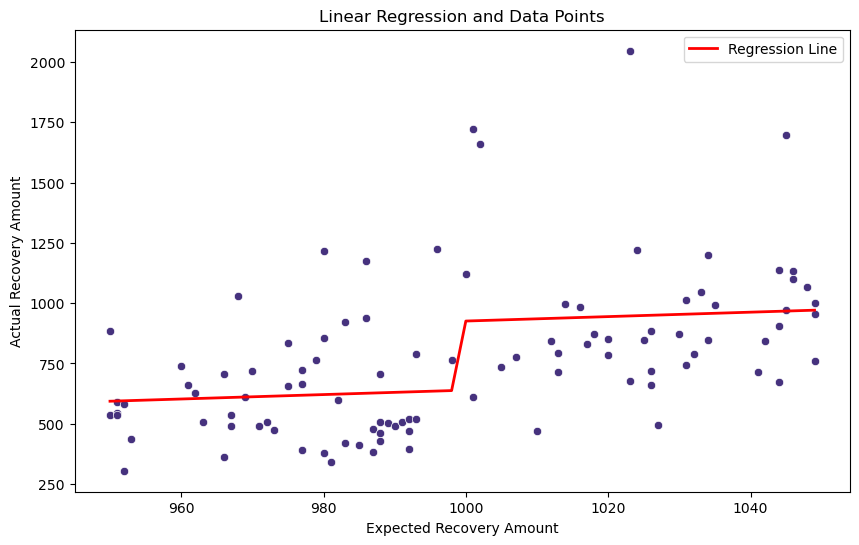

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=era_950_1050)
plt.plot(era_950_1050['expected_recovery_amount'], model.fittedvalues, color='red', linewidth=2, label='Regression Line')
plt.xlabel("Expected Recovery Amount")
plt.ylabel("Actual Recovery Amount")
plt.title("Linear Regression and Data Points")
plt.legend()
plt.show()